In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

In [2]:
np.random.seed(42)

In [3]:
import os
from skimage.transform import rescale, resize
from skimage.feature import hog

In [4]:
class ImagePreProcessor:
    def __init__(self, path:str):
        self.path = path
    
    def transform(self):
        image = io.imread(self.path, as_gray=True)
        rescaled_image = rescale(image, 1/2)
        resized_image = resize(rescaled_image, (228,228))
        hog_feature = hog(resized_image)
        return np.array([hog_feature])


In [5]:
p_image = ImagePreProcessor(r'data\Brown_spot\DSC_0301.JPG')
p_image.transform().shape

(1, 54756)

In [6]:
folders = ['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']
image_vectors = []
Labels = []
for d in folders:
    label = folders.index(d)
    for file in os.listdir(f'dataSet\\{d}'):
        image = io.imread(f'dataSet\\{d}\\{file}', as_gray=True)
        rescaled_image = rescale(image, 1/2)
        resized_image = resize(rescaled_image, (228,228))
        hog_feature = hog(resized_image)
        image_vectors.append(hog_feature)
        Labels.append(label)

In [7]:
feature_vectors = np.array(image_vectors)
labels = np.array(Labels)

In [8]:
feature_vectors.shape

(339, 54756)

In [9]:
# Spliting in Train, Test Set
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(
    feature_vectors, labels, test_size=0.25
)

In [10]:
train_images.shape, train_labels.shape

((254, 54756), (254,))

In [11]:
train_images[0].shape

(54756,)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(train_images, train_labels)

LogisticRegression(max_iter=5000)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


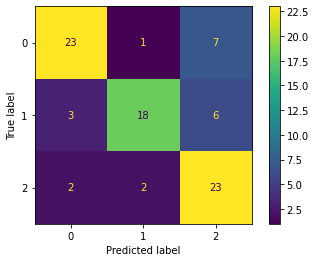

In [13]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(model, test_images, test_labels)

In [14]:
ypred = model.predict(test_images).astype(np.float64)
accuracy_score(test_labels, ypred)

0.7529411764705882

# SVM

In [15]:
from sklearn import svm
svc = svm.SVC()
svc.fit(train_images, train_labels)

SVC()

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


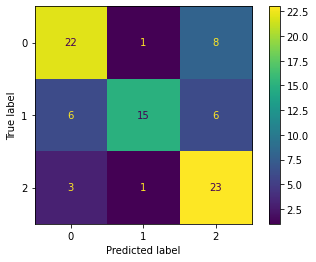

In [16]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(svc, test_images, test_labels)

In [17]:
ypred = svc.predict(test_images).astype(np.float64)
accuracy_score(test_labels, ypred)

0.7058823529411765

# Neural Network

In [18]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(activation='logistic',hidden_layer_sizes=(784, 228),verbose=2)
nn.fit(train_images, train_labels)

Iteration 1, loss = 1.28014418
Iteration 2, loss = 1.19640110
Iteration 3, loss = 0.96255881
Iteration 4, loss = 0.97430088
Iteration 5, loss = 0.89060843
Iteration 6, loss = 0.78704746
Iteration 7, loss = 0.68002706
Iteration 8, loss = 0.58768985
Iteration 9, loss = 0.50586501
Iteration 10, loss = 0.43538265
Iteration 11, loss = 0.36450944
Iteration 12, loss = 0.31112382
Iteration 13, loss = 0.24348057
Iteration 14, loss = 0.19736677
Iteration 15, loss = 0.16108400
Iteration 16, loss = 0.12108445
Iteration 17, loss = 0.09657761
Iteration 18, loss = 0.07222365
Iteration 19, loss = 0.05886392
Iteration 20, loss = 0.04720830
Iteration 21, loss = 0.03706782
Iteration 22, loss = 0.03218614
Iteration 23, loss = 0.02753101
Iteration 24, loss = 0.02344331
Iteration 25, loss = 0.02071953
Iteration 26, loss = 0.01876173
Iteration 27, loss = 0.01703344
Iteration 28, loss = 0.01552718
Iteration 29, loss = 0.01438885
Iteration 30, loss = 0.01350761
Iteration 31, loss = 0.01273617
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(784, 228), verbose=2)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


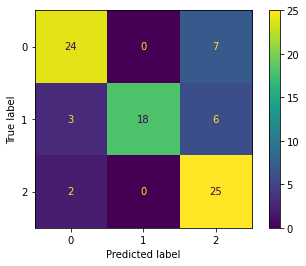

In [19]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(nn, test_images, test_labels)

In [20]:
ypred = nn.predict(test_images).astype(np.float64)
accuracy_score(test_labels, ypred)

0.788235294117647

In [36]:
from joblib import dump
dump(nn, 'CropDiseaseClassifier_nn_784_228_92')

['CropDiseaseClassifier_nn_784_228_92']

In [23]:
folders = ['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']
image_vectorsT = []
LabelsT = []
for d in folders:
    label = folders.index(d)
    for file in os.listdir(f'data\\{d}'):
        image = io.imread(f'data\\{d}\\{file}', as_gray=True)
        rescaled_image = rescale(image, 1/2)
        resized_image = resize(rescaled_image, (228,228))
        hog_feature = hog(resized_image)
        image_vectorsT.append(hog_feature)
        LabelsT.append(label)

In [26]:
feature_vectors_test = np.array(image_vectorsT)
labels_test = np.array(LabelsT)

In [27]:
feature_vectors_test.shape

(120, 54756)

In [29]:
labels_test.shape

(120,)

In [33]:
ypred = nn.predict(feature_vectors_test)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


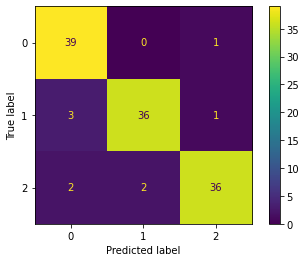

In [31]:
plot_confusion_matrix(nn, feature_vectors_test, labels_test)

In [35]:
ypred = nn.predict(feature_vectors_test).astype(np.float64)
accuracy_score(labels_test, ypred)

0.925

# NN2

In [37]:
nn = MLPClassifier(activation='logistic',hidden_layer_sizes=(784, 228, 64,10 ),verbose=2)
nn.fit(train_images, train_labels)

Iteration 1, loss = 1.13526940
Iteration 2, loss = 1.11874339
Iteration 3, loss = 1.11349540
Iteration 4, loss = 1.10668544
Iteration 5, loss = 1.10218332
Iteration 6, loss = 1.09669038
Iteration 7, loss = 1.09178688
Iteration 8, loss = 1.08562653
Iteration 9, loss = 1.07716457
Iteration 10, loss = 1.06652301
Iteration 11, loss = 1.05288547
Iteration 12, loss = 1.03629770
Iteration 13, loss = 1.01894444
Iteration 14, loss = 0.99447241
Iteration 15, loss = 0.97172335
Iteration 16, loss = 0.94898943
Iteration 17, loss = 0.92543567
Iteration 18, loss = 0.90357545
Iteration 19, loss = 0.88221812
Iteration 20, loss = 0.86234971
Iteration 21, loss = 0.84338668
Iteration 22, loss = 0.82487588
Iteration 23, loss = 0.80707676
Iteration 24, loss = 0.78959985
Iteration 25, loss = 0.77311112
Iteration 26, loss = 0.75668129
Iteration 27, loss = 0.74152740
Iteration 28, loss = 0.72651599
Iteration 29, loss = 0.71267955
Iteration 30, loss = 0.69927078
Iteration 31, loss = 0.68666574
Iteration 32, los

C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(784, 228, 64, 10),
              verbose=2)

In [38]:
ypred = nn.predict(test_images).astype(np.float64)
accuracy_score(test_labels, ypred)

0.7411764705882353

In [39]:
ypred = nn.predict(feature_vectors_test).astype(np.float64)
accuracy_score(labels_test, ypred)

0.9333333333333333

In [40]:
dump(nn, 'CropDiseaseClassifier_nn_784_228_64_10_93')

['CropDiseaseClassifier_nn_784_228_64_10_93']